In [15]:
import pandas as pd # we import pandas as pd
import matplotlib.pyplot as plt # we import matplotlib.pyplot for creating our graphs
import seaborn as sns # we import seaborn as sns

df = pd.read_csv('/content/final.csv') # We ask google colab to read the data that i imported before

print(df.head()) # we print the first 5 rows of our data so we can know what is it about
print(df.info()) # we use this function to know how many data we have, the type, or if we are missing some values
print(df.describe()) # this function gives us an statistical summary of our data, which we can use after to make graphs

print("Null values:\n", df.isnull().sum()) # just to check if we have null values in some columns

# Now we want to check if there are any irrelevant columns or duplicates
cols_to_drop = ['Lat Long', 'CustomerID']  # this columns may not be that useful now
df.drop(columns=cols_to_drop, inplace=True) # and we drop them from our dataframe

# Now we convert columns if it is necessary
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce') # some of them can come as a string
df.dropna(subset=['Total Charges'], inplace=True) # we check if some of them have NaN values


   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

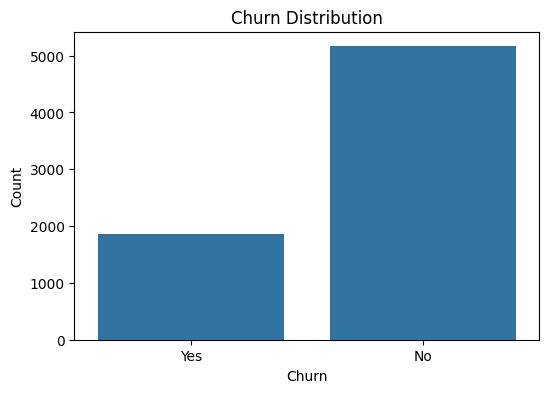

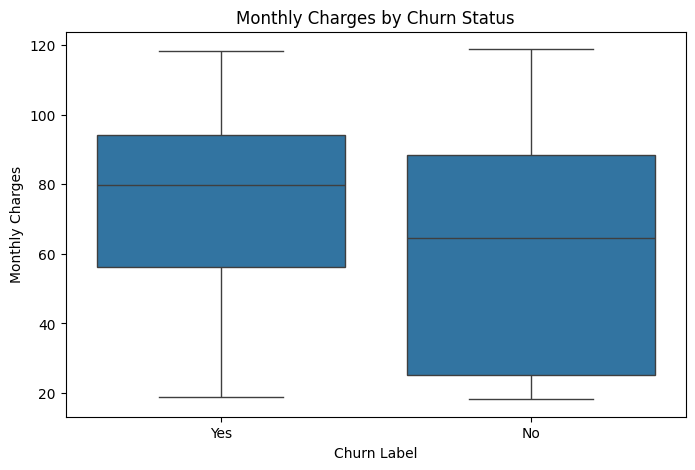

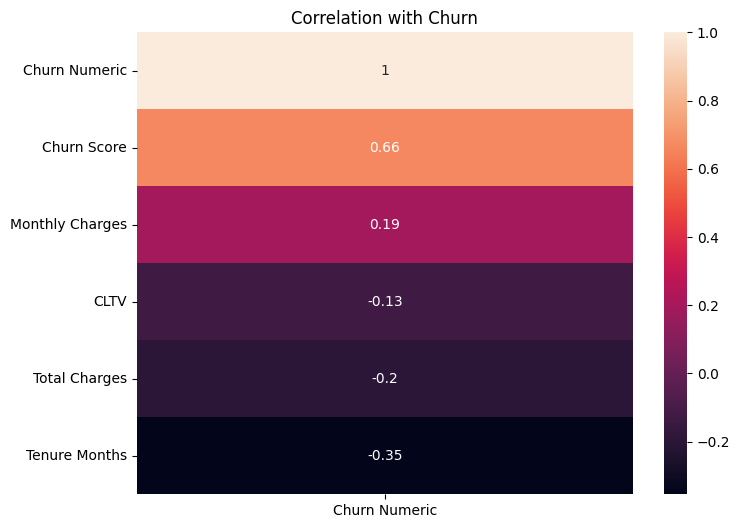

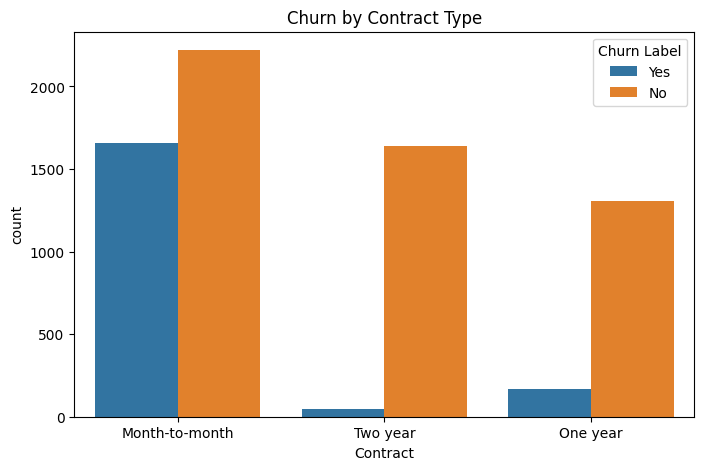


Average metrics by Churn group:
              Monthly Charges  Total Charges  Tenure Months
Churn Label                                               
No                 61.307408    2555.344141      37.650010
Yes                74.441332    1531.796094      17.979133


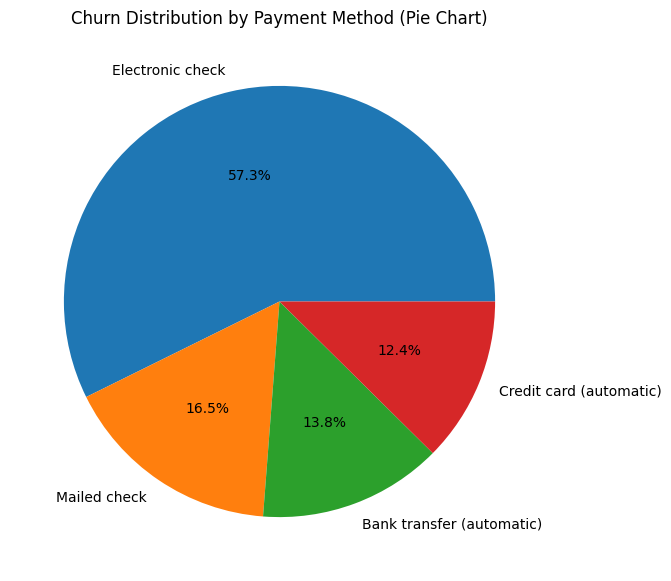

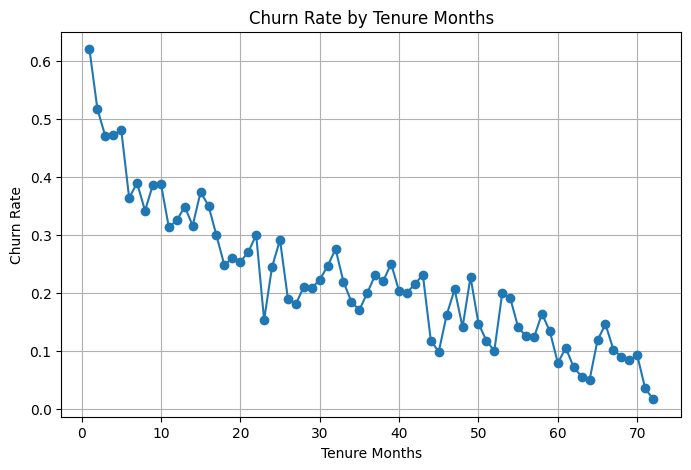


Top 5 Churn Reasons:
 Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Name: count, dtype: int64


/tmp/ipython-input-37-454320828.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='Set3') # using seaborn, to create a barplot, and we add a palette to give it different colors


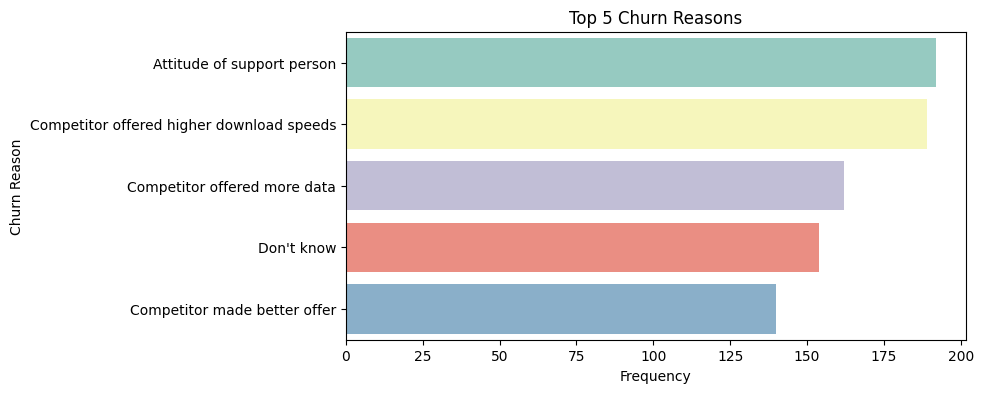

In [37]:
# Now that we prepared our data, lets create some graphs

# first, we can make a churn distribution
plt.figure(figsize=(6, 4)) # for ploting, and we put the size we want
sns.countplot(x='Churn Label', data=df) # we use seaborn to create a countplot
plt.title("Churn Distribution") # we put a title
plt.xlabel("Churn") # x label
plt.ylabel("Count") # y label
plt.show() # to show our graph

# Now the montly charges distribution by churn status
plt.figure(figsize=(8, 5)) # for ploting, and we put the size we want
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df) # we indicate the labels and our data, we create a boxplot using seaborn
plt.title("Monthly Charges by Churn Status") # title for our graph
plt.show() # we show our graph

# Correlation with churn
df['Churn Numeric'] = df['Churn Label'].map({'No': 0, 'Yes': 1}) # so here we convert churn labels to numeric values (No = 0, Yes = 1) for correlation analysis


# Now include it in your correlation matrix
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV', 'Churn Numeric'] # i want to know the correlation between this values and the churn, so first i create a list with them
corr = df[num_cols].corr() # we calculate the correlation

plt.figure(figsize=(8, 6)) # we decide the size of our plot
sns.heatmap(corr[['Churn Numeric']].sort_values(by='Churn Numeric', ascending=False), annot=True) # i want to use a heatmap to understand the correlation
# between the churn and the values we asigned before
plt.title("Correlation with Churn") # we give it a title
plt.show() # we show it

# Churn by contract type
plt.figure(figsize=(8, 5)) # for ploting, and we put the size we want
sns.countplot(x='Contract', hue='Churn Label', data=df) # we create a countplot with seaborn to show the churn by contact type
plt.title("Churn by Contract Type") # we write the title
plt.show() # we display the plot

# Group averages by churn label
# first we are going to group our data by churn label and then we write the data that we are going to use
grouped = df.groupby('Churn Label')[['Monthly Charges', 'Total Charges', 'Tenure Months']].mean()
# we print the results
print("\nAverage metrics by Churn group:\n", grouped)

# Churn by payment method
# if there is a churn label, we identify the payment method
payment_churn = df[df['Churn Label']=='Yes']['Payment Method'].value_counts()
# we create our figure and define the size
plt.figure(figsize=(7, 7))
# we want to use a pie chart so we create it with the variable we created before
payment_churn.plot.pie(autopct='%1.1f%%') # here i want to show the percentage
plt.title("Churn Distribution by Payment Method (Pie Chart)") # we write the title
plt.ylabel('') # y label
plt.show() # we show it

# Average churn rate over the number of months a customer has been with the company
# so first we create our tenure_churn variable in which we group by tenure months and churn label
# then we calculate the number of customers who churned within each tenure group
tenure_churn = df.groupby('Tenure Months')['Churn Label'].apply(lambda x: (x=='Yes').mean())
plt.figure(figsize=(8, 5)) # we create our figure and the size
tenure_churn.plot(kind='line', marker='o') # we create out plot, we want a line and a o or point to show the specific data
plt.title("Churn Rate by Tenure Months") # we write the title
plt.xlabel("Tenure Months") # x label
plt.ylabel("Churn Rate") # y label
plt.grid(True) # we put the grid so we can better visualize the information
plt.show() # we show it


#Top 5 churn reasons
if 'Churn Reason' in df.columns: # we want to check if the churn reason exists in our dataset (which does)
# in order to understand the churn reasons, we start by checking if they churned and then we count the reasons, to see if they get repeated
# so then we count them and we print the top 5 reasons
    top_reasons = df[df['Churn Label'] == 'Yes']['Churn Reason'].value_counts().nlargest(5)
    print("\nTop 5 Churn Reasons:\n", top_reasons)

# now that we analyzed that, we want to transform it into a graph so we can visuialize it better
    plt.figure(figsize=(8, 4)) # we create our figure, and decide the size
    sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='Set3') # using seaborn, to create a barplot, and we add a palette to give it different colors
    plt.title("Top 5 Churn Reasons") # title
    plt.xlabel("Frequency") # x label
    plt.show() # we show our graph
